In [26]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from torch.autograd import Variable
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import models

import torch
from torch import autograd
import torch.nn as nn
from torch.utils.data import DataLoader, dataset
from torchvision.datasets import MNIST
import torchvision.transforms as T
eps = np.finfo(float).eps
import torchvision
import tqdm
from torchsummary import summary
import argparse
import os
import time

In [27]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=1, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=1, shuffle=False)

In [28]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.encoder=nn.Sequential(nn.Conv2d(1, 16, 3, padding=1),
                                   nn.LeakyReLU(),
                                   nn.Dropout(0.5),
                                   nn.Conv2d(16, 4, 3, padding=1),
                                   nn.LeakyReLU(),
                                   nn.Dropout(0.5),
                                   nn.Flatten(),
                                    nn.Linear(3136,1000),
                                  nn.LeakyReLU(),
                                   nn.Dropout(0.5),
                                  nn.Linear(1000,100))
    def forward(self, x):
        z = self.encoder(x)
        return z

In [29]:
model=Encoder()


In [30]:
model.load_state_dict(torch.load('Models/encoder_z.pt'))
model.to('cuda:0')

Encoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.5, inplace=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0.5, inplace=False)
    (6): Flatten()
    (7): Linear(in_features=3136, out_features=1000, bias=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Dropout(p=0.5, inplace=False)
    (10): Linear(in_features=1000, out_features=100, bias=True)
  )
)

In [31]:
a=[]
y=[]
import time
start_time = time.time()

for batch_i, (data, target) in enumerate(train_loader):
        # move tensors to GPU if
        data=data.cuda()
        output=model(data)
        a.append(output.cpu().detach().numpy())
        y.append(target.cpu().detach().numpy())
        

print("--- %s seconds ---" % (time.time() - start_time))

--- 88.84637498855591 seconds ---


In [32]:
X_train=pd.DataFrame(np.array(a).reshape((60000,100)))
y_train=pd.DataFrame(y)

In [33]:
a=[]
y=[]
import time
start_time = time.time()

for batch_i, (data, target) in enumerate(test_loader):
        # move tensors to GPU if
        data=data.cuda()
        output=model(data)
        a.append(output.cpu().detach().numpy())
        y.append(target.cpu().detach().numpy())
        

print("--- %s seconds ---" % (time.time() - start_time))

--- 14.755534648895264 seconds ---


In [34]:
X_test=pd.DataFrame(np.array(a).reshape((10000,100)))
y_test=pd.DataFrame(y)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
names = ["Ensemble Classifier","SVC","LogisticRegression","Nearest Neighbors",
         "Decision Tree", "Random Forest",  "AdaBoost",
         "Naive Bayes", "XGBClassifier"]

-------------------------------------------------------------------------
SVC


C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9583
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


[[ 968    0    1    1    0    1    3    2    4    0]
 [   0 1124    2    1    1    1    3    1    2    0]
 [   7    2  994    3    3    1    4    9    9    0]
 [   1    1    9  961    1   13    0    8   14    2]
 [   1    0    5    1

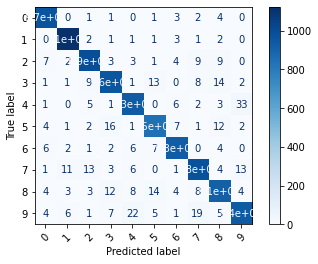

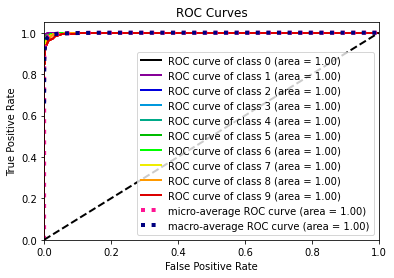

-------------------------------------------------------------------------
LogisticRegression


C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8902
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       980
           1       0.96      0.96      0.96      1135
           2       0.89      0.87      0.88      1032
           3       0.86      0.88      0.87      1010
           4       0.88      0.90      0.89       982
           5       0.84      0.82      0.83       892
           6       0.91      0.92      0.91       958
           7       0.91      0.88      0.89      1028
           8       0.85      0.85      0.85       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


[[ 930    0    2    4    0   17   13    3    7    4]
 [   0 1095    8    4    1    3    3    1   20    0]
 [  19    8  895   14   11   10   20   19   33    3]
 [   9    2   22  885    2   42    1   11   26   10]
 [   3    2    6    5

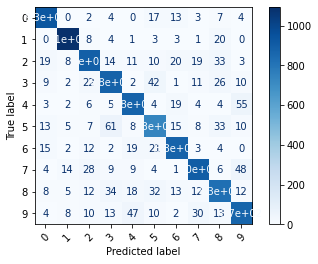

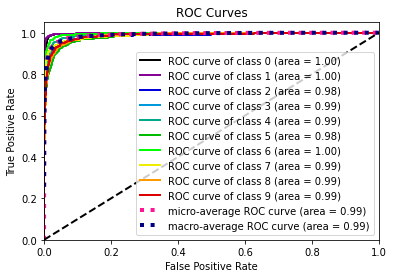

-------------------------------------------------------------------------
Nearest Neighbors


C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9588
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.95      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.94      0.95      0.95       892
           6       0.97      0.98      0.98       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


[[ 973    0    1    0    0    1    3    1    1    0]
 [   0 1132    1    1    1    0    0    0    0    0]
 [   7    2  992    3    2    1    3   12    9    1]
 [   1    0    6  955    1   21    0    8   14    4]
 [   1    2    2    0

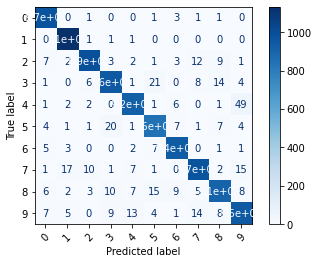

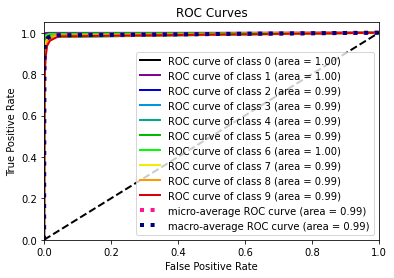

-------------------------------------------------------------------------
Decision Tree
0.7797
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       980
           1       0.93      0.93      0.93      1135
           2       0.79      0.77      0.78      1032
           3       0.73      0.76      0.75      1010
           4       0.73      0.73      0.73       982
           5       0.70      0.67      0.68       892
           6       0.84      0.82      0.83       958
           7       0.79      0.77      0.78      1028
           8       0.69      0.71      0.70       974
           9       0.71      0.72      0.71      1009

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000


[[ 866    1   11   16   12   22   19    6   19    8]
 [   0 1056    7   14    2    9    6   11   28    2]
 [  24   17  796   36   28   20   24   

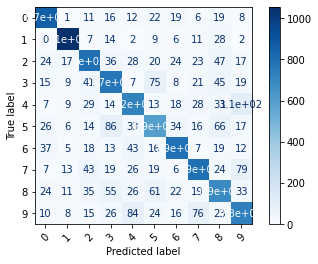

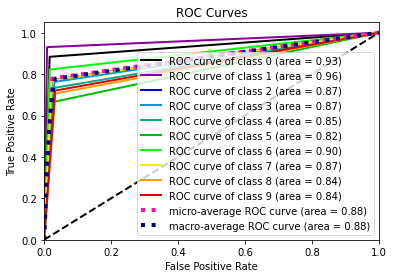

-------------------------------------------------------------------------
Random Forest


C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.943
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.92      0.93      1010
           4       0.94      0.93      0.93       982
           5       0.93      0.91      0.92       892
           6       0.95      0.97      0.96       958
           7       0.95      0.94      0.94      1028
           8       0.93      0.90      0.92       974
           9       0.91      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000


[[ 962    0    3    1    0    2    6    1    5    0]
 [   0 1123    2    3    1    1    3    0    2    0]
 [  12    3  978    9    3    0    6   10   10    1]
 [   5    2   19  929    1   22    0    9   17    6]
 [   1    2    4    1 

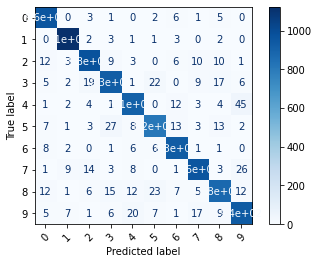

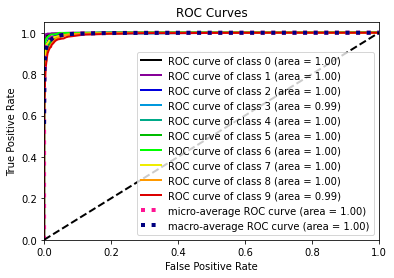

-------------------------------------------------------------------------
AdaBoost


C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.713
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       980
           1       0.90      0.94      0.92      1135
           2       0.75      0.66      0.70      1032
           3       0.68      0.66      0.67      1010
           4       0.61      0.71      0.66       982
           5       0.60      0.49      0.54       892
           6       0.76      0.79      0.77       958
           7       0.76      0.74      0.75      1028
           8       0.67      0.59      0.63       974
           9       0.59      0.61      0.60      1009

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000


[[ 881    0    6    6    2   36   31    3    7    8]
 [   0 1066   12    7    3   23    1    9   12    2]
 [  53   39  677   42   36   21   76   30   52    6]
 [  43    5   42  667   10   99   25   43   53   23]
 [  27    5   23   11 

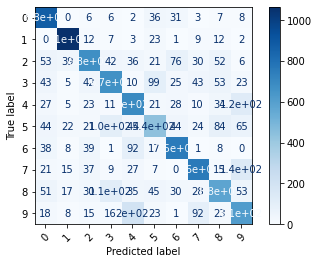

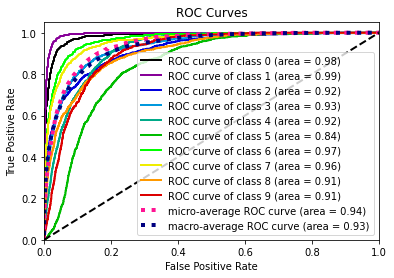

-------------------------------------------------------------------------
XGBClassifier


C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9044
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.89      0.90      1032
           3       0.89      0.87      0.88      1010
           4       0.89      0.90      0.89       982
           5       0.87      0.86      0.86       892
           6       0.92      0.94      0.93       958
           7       0.91      0.89      0.90      1028
           8       0.87      0.86      0.87       974
           9       0.88      0.88      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


[[ 945    0    4    5    0    8   12    1    3    2]
 [   0 1109    4    2    1    4    3    1   11    0]
 [  13   10  918   16   13    6    8   16   27    5]
 [   9    4   25  879    0   39    2   17   25   10]
 [   4    2    5    1

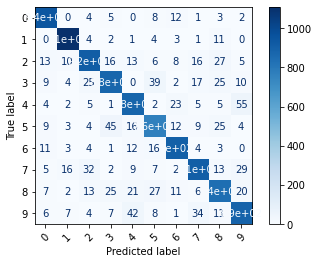

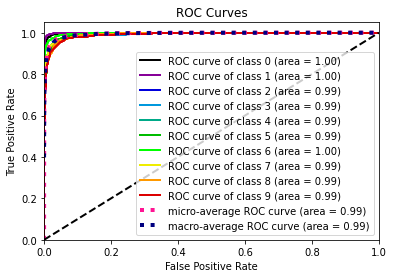

In [36]:
 h= .02  # step size in the mesh
estimators = [('rf', RandomForestClassifier(max_depth=20, n_estimators=100, max_features=1)),
     ('lr',LogisticRegression(max_iter=2000)),
    ('knn',KNeighborsClassifier(3)),
    #('tree',DecisionTreeClassifier(max_depth=5)),
    ('SVC',SVC()),
    #('Adaboost',AdaBoostClassifier()),
    #('GaussNB',GaussianNB()),
    ('XGB',XGBClassifier())]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())
names = [#"Ensemble Classifier",
         "SVC","LogisticRegression","Nearest Neighbors",
         "Decision Tree", "Random Forest",  "AdaBoost",
      #   "Naive Bayes",
    "XGBClassifier"]
#pca1 = PCA(n_components=2)

classifiers = [
    #clf,
    SVC(probability=True),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
   # GaussianNB(),
    XGBClassifier()]
i1=0
df=pd.DataFrame()
for i,clf in enumerate((classifiers)):
    #scores = cross_val_score(clf, X, y, cv=5)
    print("-------------------------------------------------------------------------")
    print(names[i])
    #print("Scores five fold CV"+str(scores))
    #print("mean score  : "+str(scores.mean()))
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print((accuracy_score(y_test,y_pred)))
    cm=confusion_matrix(y_test, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    #print("Precision Score : "+str(precision_score(y_test,y_pred, average=None)))
    #print("Recall Score : "+str(recall_score(y_test,y_pred)) )
    #print(TPR.mean())
    #print(TNR.mean())
    #print((f1_score(y_test,y_pred,average=None)).mean())
    #print(( matthews_corrcoef(y_test, y_pred)))
    #fpr, tpr, thresholds = metrics.roc_auc_score(y_true, y_pred)
    y_pred=clf.predict_proba(X_test)
    #print(metrics.roc_auc_score(y_test, y_pred,multi_class ='ovr'))
    y_pred=clf.predict(X_test)
    #target_names = ['COVID 19', 'NORMAL','Pneumonia']
    print(classification_report(y_test, y_pred))
    titles_options = [("", None)]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,xticks_rotation=45)
        disp.ax_.set_title(title)
        

        print(title)
        print(disp.confusion_matrix)
    #plt.clim(0,450)

    plt.show()
    y_probas =clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas)
    plt.show()
    y_score = clf.predict_proba(X_test)
    y_test=y_test
    y_pred = clf.predict(X_test)
    df.loc[i1,'Classifier']=names[i]
    cm=confusion_matrix(y_test, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    df.loc[i1,'Acc']=accuracy_score(y_test,y_pred)
    df.loc[i1,'Sens']=TPR.mean()
    df.loc[i1,'Spec']=TNR.mean()
    df.loc[i1,'f1 Score']=(f1_score(y_test,y_pred,average=None)).mean()
    df.loc[i1,'MCC']= matthews_corrcoef(y_test, y_pred)
    df.loc[i1,'AUC']=metrics.roc_auc_score(y_test, y_score,multi_class ='ovr')
    i1=i1+1
    #print(df)
    #clf.fit(X1,y1)
    #plot_decision_regions(X1, y1, classifier=clf)

In [37]:
df

,Classifier,Acc,Sens,Spec,f1 Score,MCC,AUC
0,SVC,0.9583,0.957843,0.995369,0.957870,0.953652,0.998813
1,LogisticRegression,0.8902,0.888724,0.987814,0.888601,0.877970,0.990121
2,Nearest Neighbors,0.9588,0.958274,0.995424,0.958316,0.954223,0.992602
3,Decision Tree,0.7797,0.776674,0.975548,0.776656,0.755147,0.876111
4,Random Forest,0.9430,0.942174,0.993672,0.942155,0.936661,0.996966
5,AdaBoost,0.7130,0.708164,0.968142,0.705551,0.681420,0.933091
6,XGBClassifier,0.9044,0.903228,0.989387,0.903040,0.893753,0.994162


In [38]:
y_train.columns=['value']

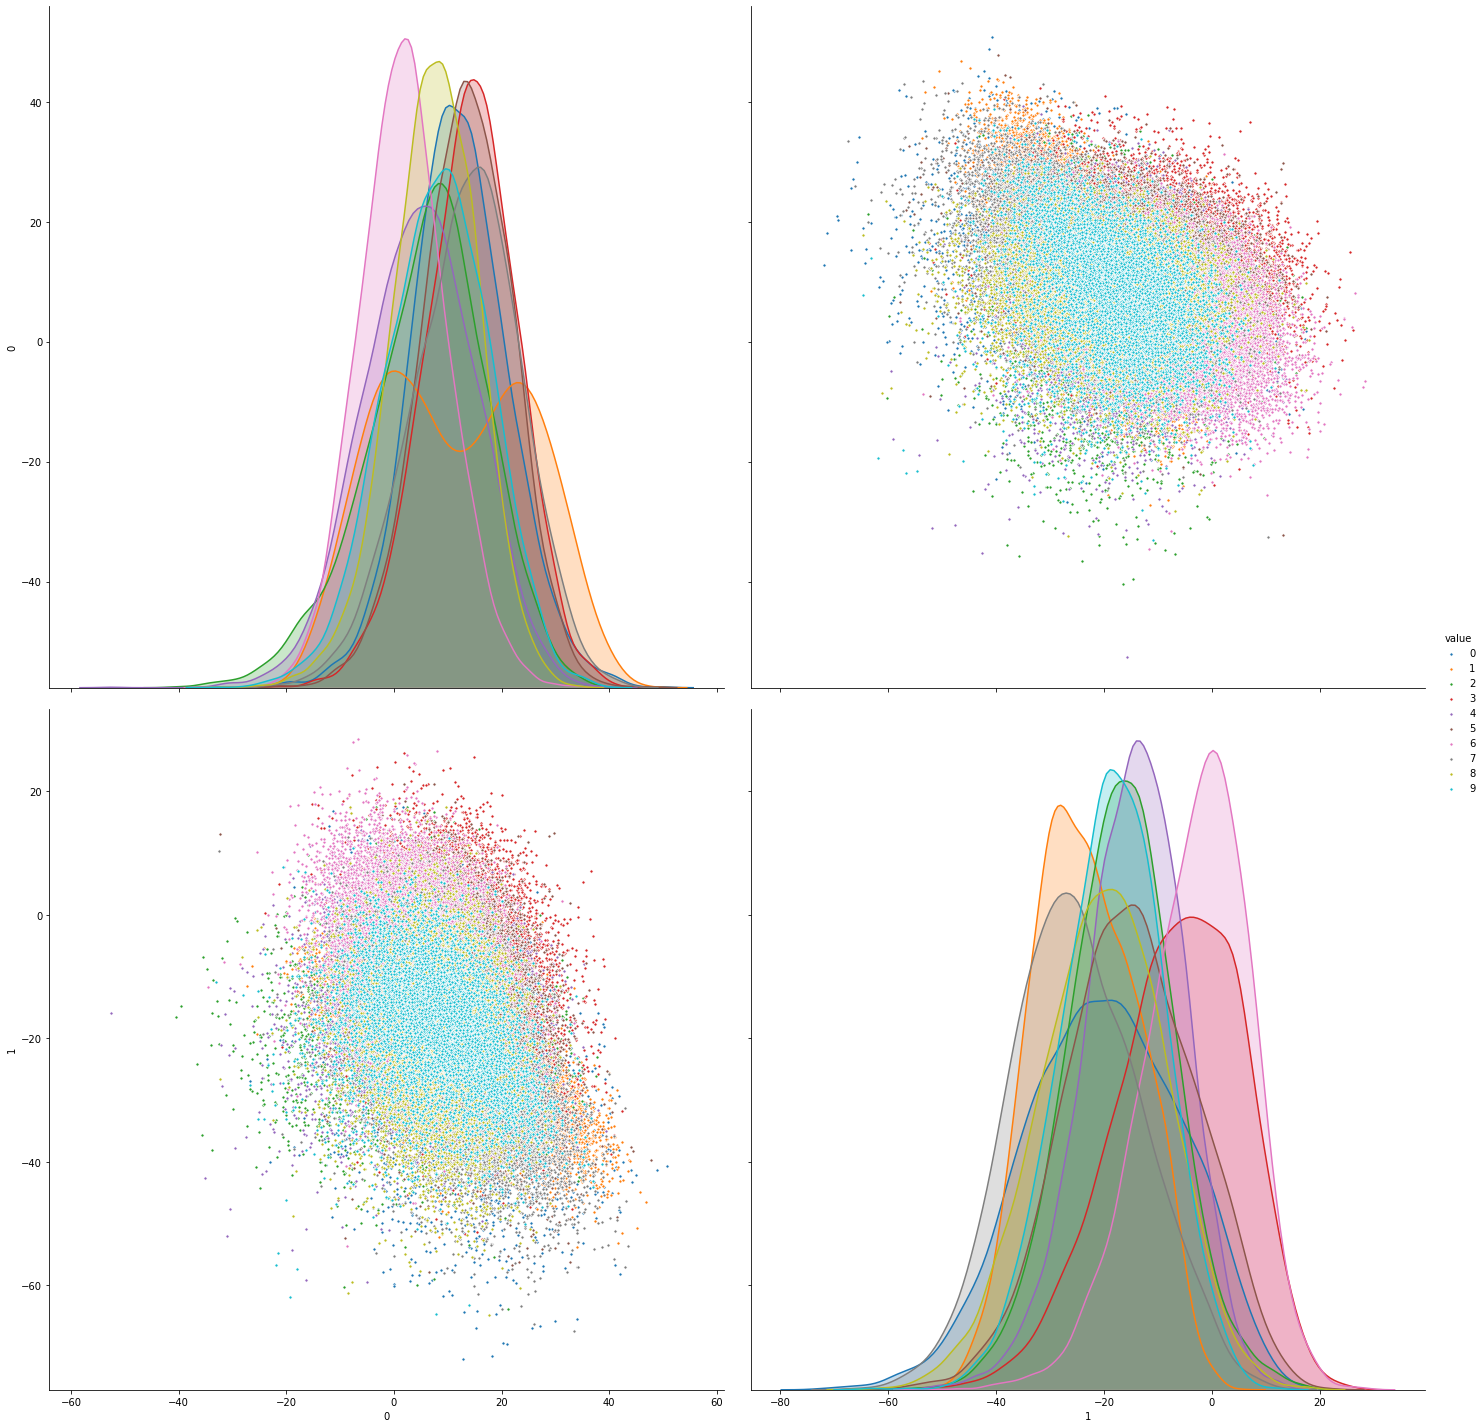

In [39]:
df1=pd.concat([X_train,y_train],axis=1)
sns.pairplot(vars=[0,1], data=df1, plot_kws={'s':10},hue="value",height=10)

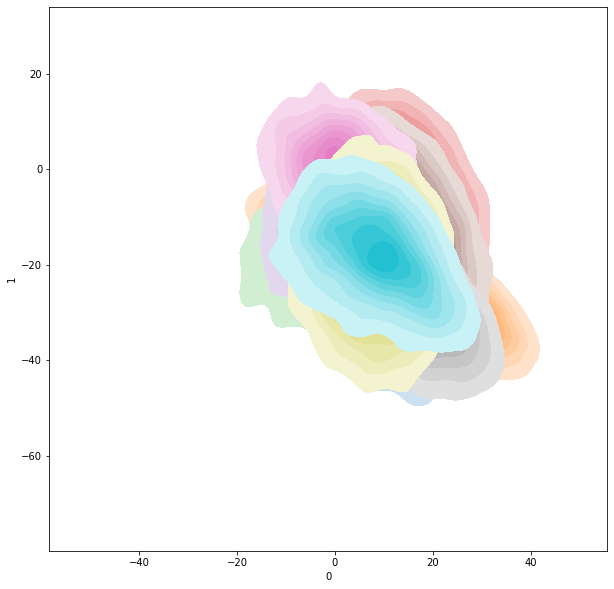

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
label_patches=[]
plt.figure(figsize=[10,10])
#plt.xlim(-40,40)
#plt.ylim(-40,40)
for x,_ in enumerate(df1.value.value_counts()):
    z=df1[df1.value==x]
    sns.kdeplot(z[0], z[1],shade=True,shade_lowest=False)#, data=z, kind="kde")
plt.show()

plt.show()


In [41]:
y_test.columns=['value']

C:\Users\vipul\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


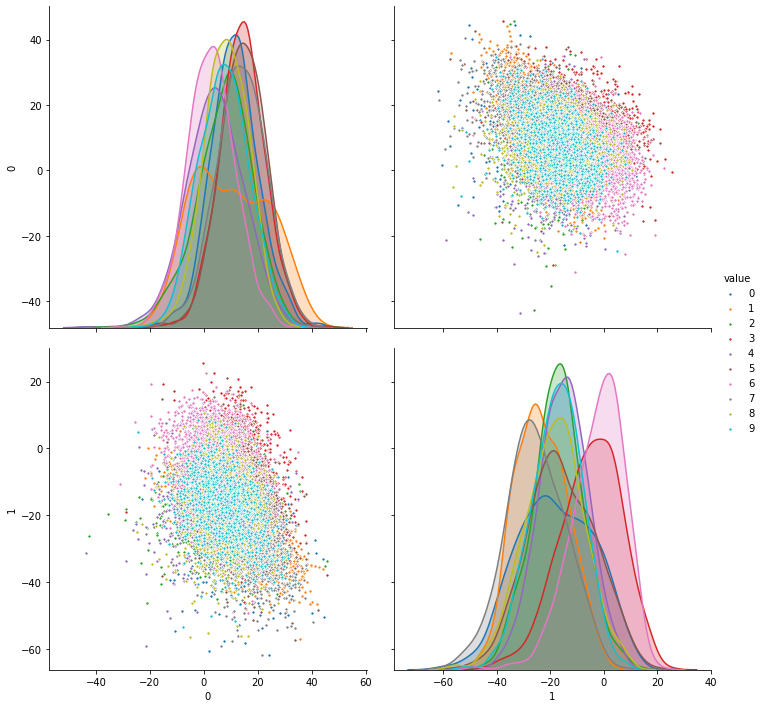

In [42]:
df1=pd.concat([X_test,y_test],axis=1)
sns.pairplot(vars=[0,1], data=df1, plot_kws={'s':10}, hue="value",size=5)

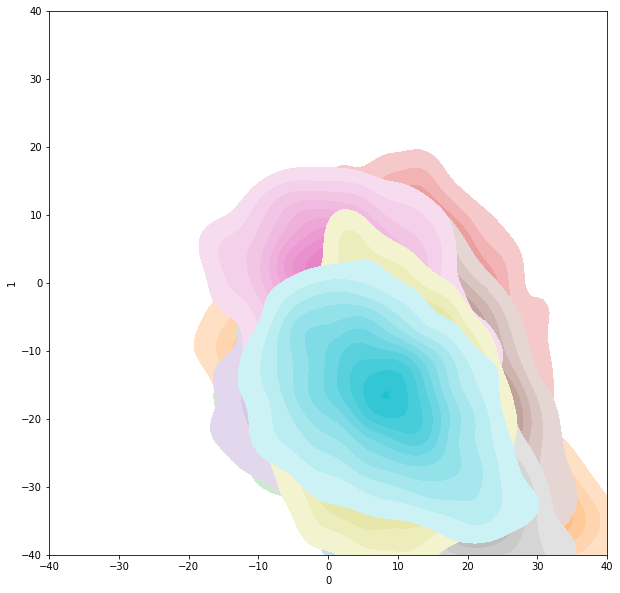

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
label_patches=[]
plt.figure(figsize=[10,10])
plt.xlim(-40,40)
plt.ylim(-40,40)
for x,_ in enumerate(df1.value.value_counts()):
    z=df1[df1.value==x]
    sns.kdeplot(z[0], z[1],shade=True,shade_lowest=False)#, data=z, kind="kde")
plt.show()

In [44]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X1=pd.DataFrame(pca.fit_transform(X_train))

C:\Users\vipul\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


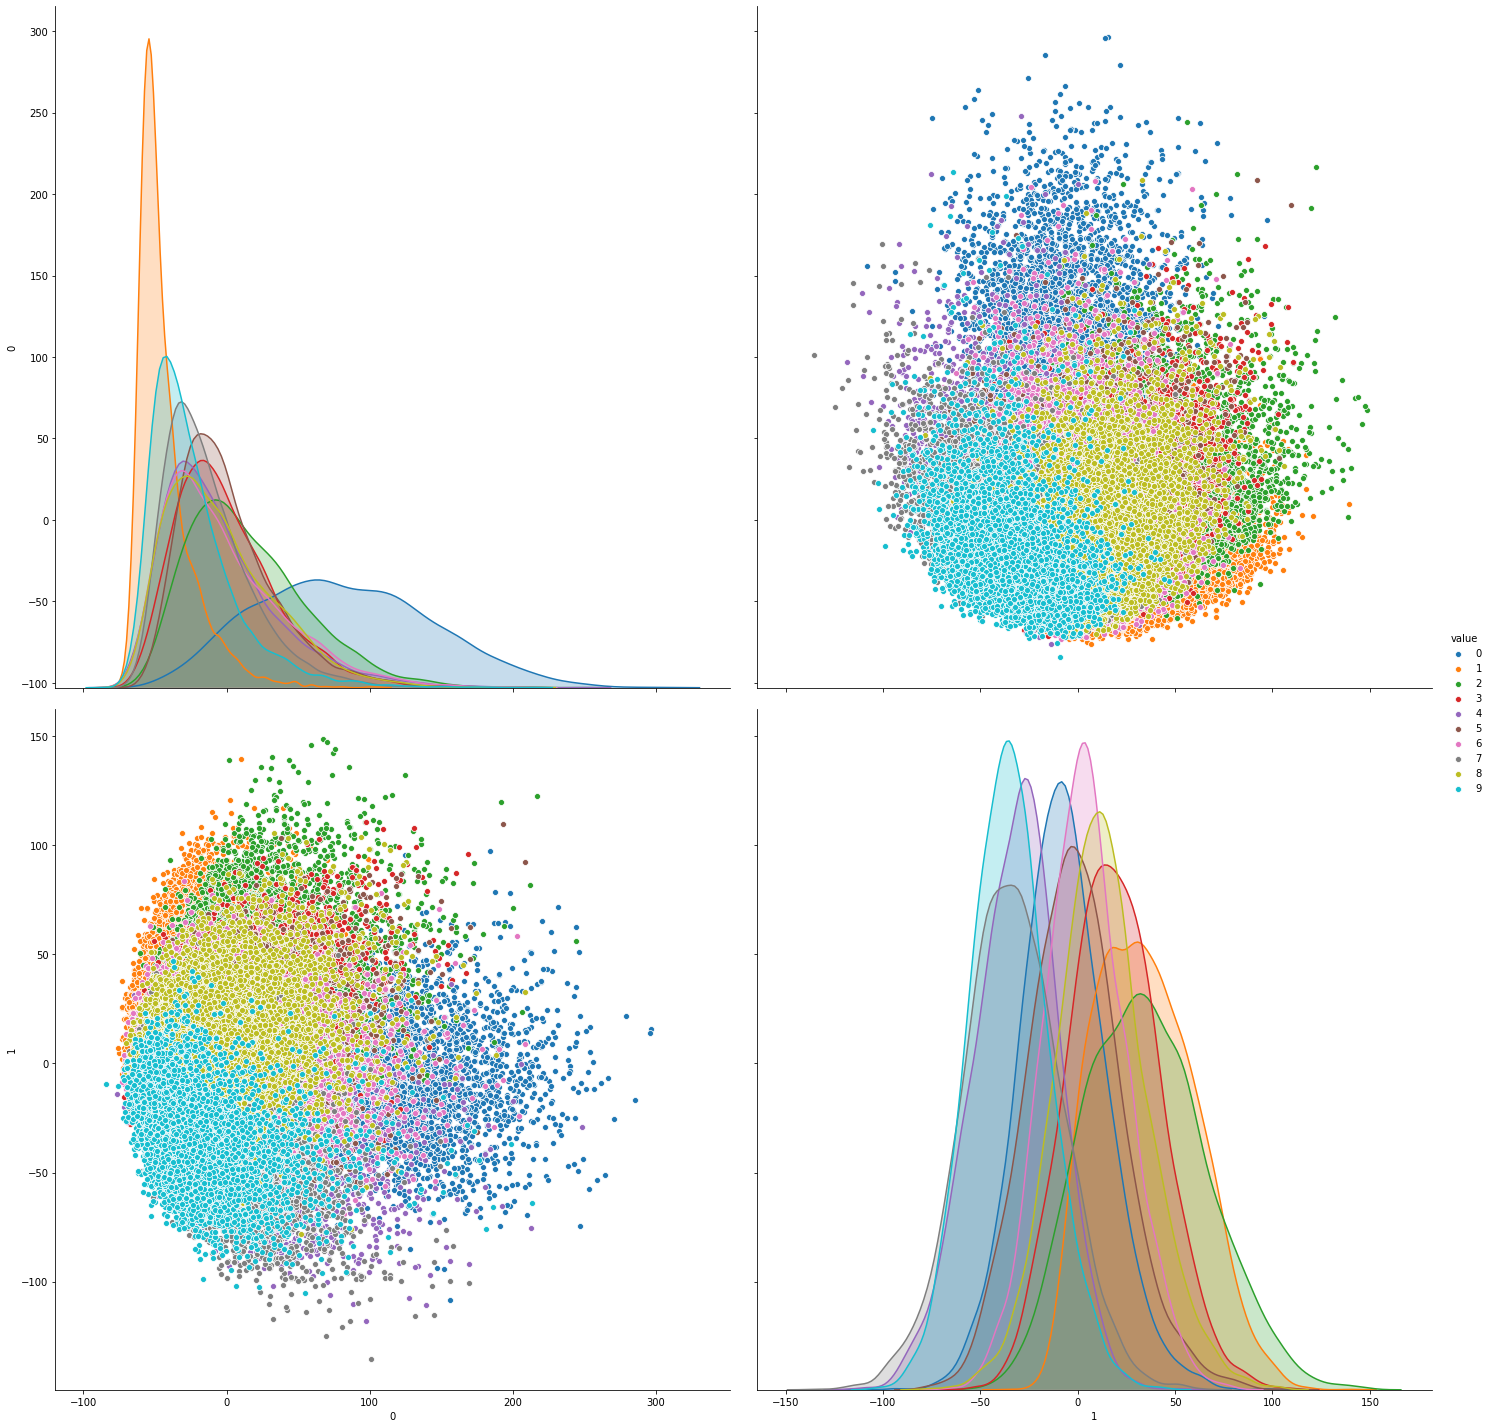

In [45]:
df1=pd.concat([X1,y_train],axis=1)
sns.pairplot(vars=[0,1], data=df1, hue="value",size=10)